In [1]:
import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None 

df = pd.read_csv("problems.csv", delimiter=";")

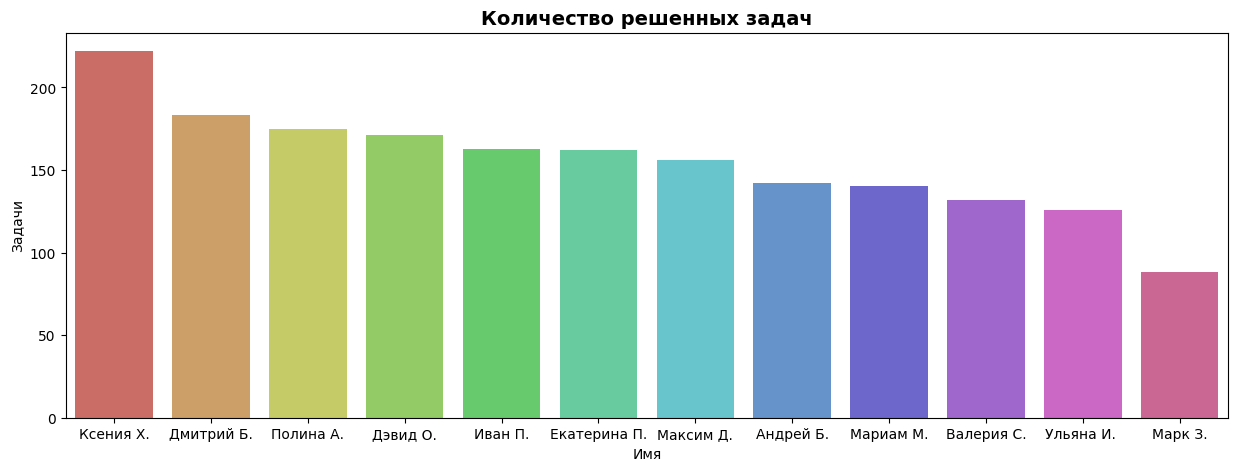

In [2]:
total_problems = an.total_problems(df).sort_values(ascending=False).reset_index(name="Задачи").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Количество решенных задач", weight="heavy", size=14)
sns.barplot(total_problems, x="Имя", y="Задачи", palette="hls", hue="Имя")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

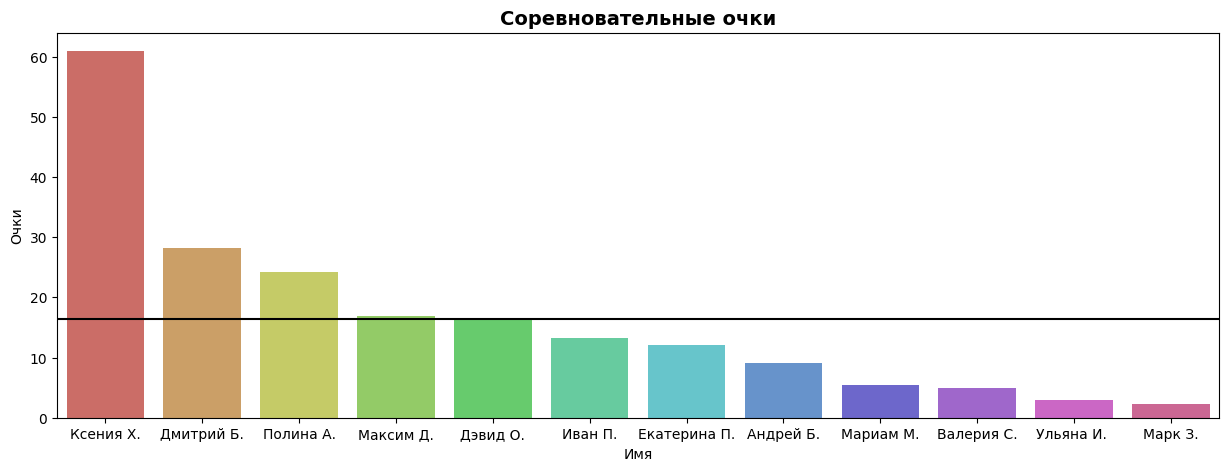

In [12]:
comp_points = an.competative_points(df, weight_func = "sigm").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette="hls", hue="Имя")
plt.axhline(comp_points["Очки"].mean(), c="black")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

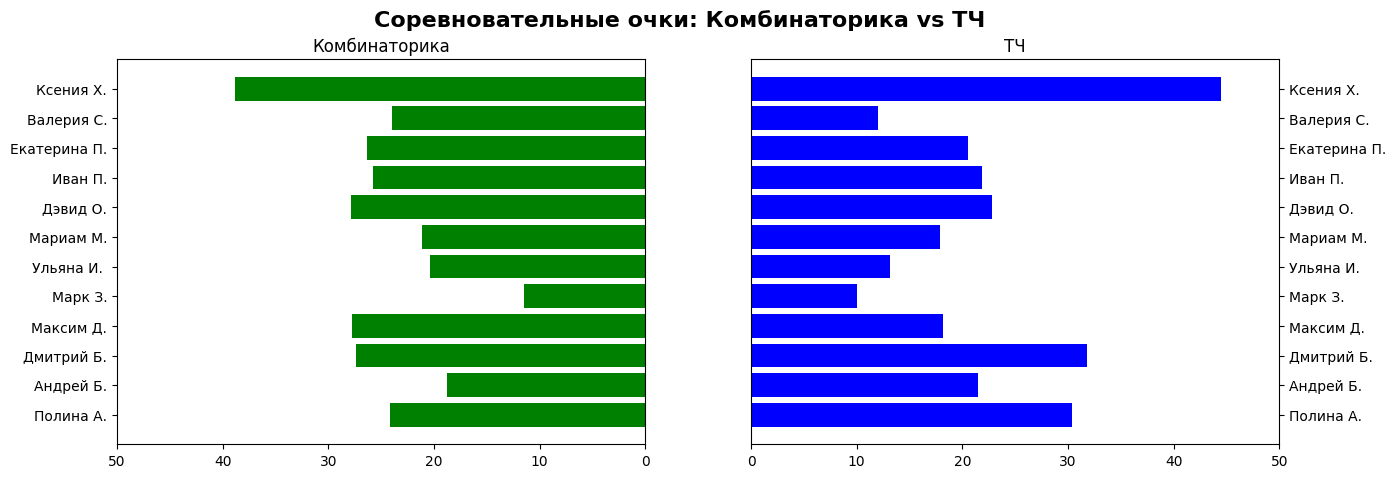

In [4]:
points_c = an.competative_points(df, topic='Комбинаторика', weight_func="sqrt")
points_t = an.competative_points(df, topic='ТЧ', weight_func="sqrt")

plt.figure(figsize=(15, 5))
plt.suptitle("Соревновательные очки: Комбинаторика vs ТЧ", size=16, weight='heavy')

plt.subplot(1, 2, 1)
plt.title("Комбинаторика")
plt.barh(points_t.index.tolist(), points_c, color='g')
plt.gca().set_xlim([50, 0])


plt.subplot(1, 2, 2)
plt.title("ТЧ")
plt.barh(points_t.index.tolist(), points_t, color='b')
plt.tick_params(axis='y', labelleft=False, labelright=True, left = False, right=True)
plt.gca().set_xlim([0, 50])



plt.show()

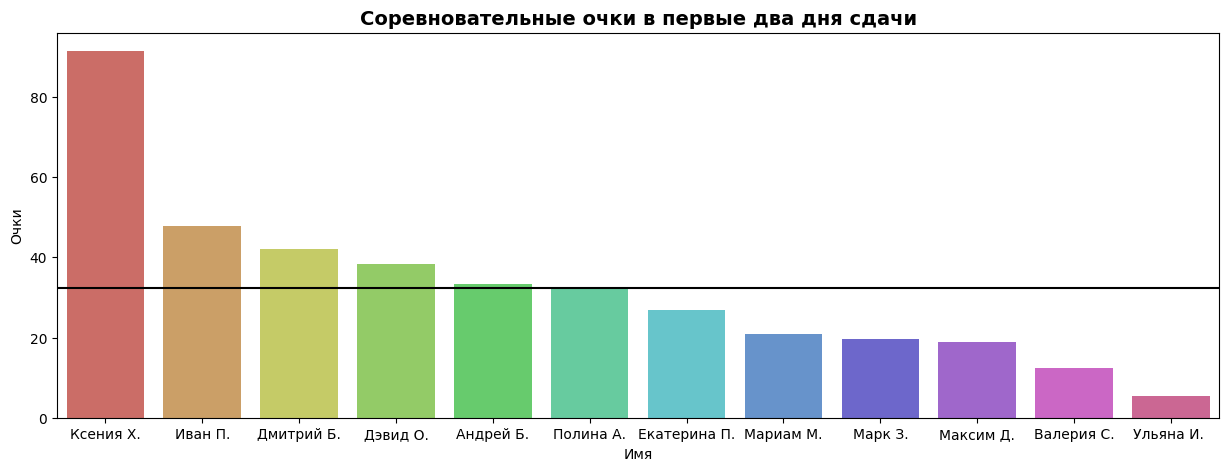

In [17]:
start_comp_points = an.competative_points(df, days=[1,2], weight_func='sqrt').sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки в первые два дня сдачи", weight="heavy", size=14)
sns.barplot(start_comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
plt.axhline(start_comp_points["Очки"].mean(), c="black")
plt.show()

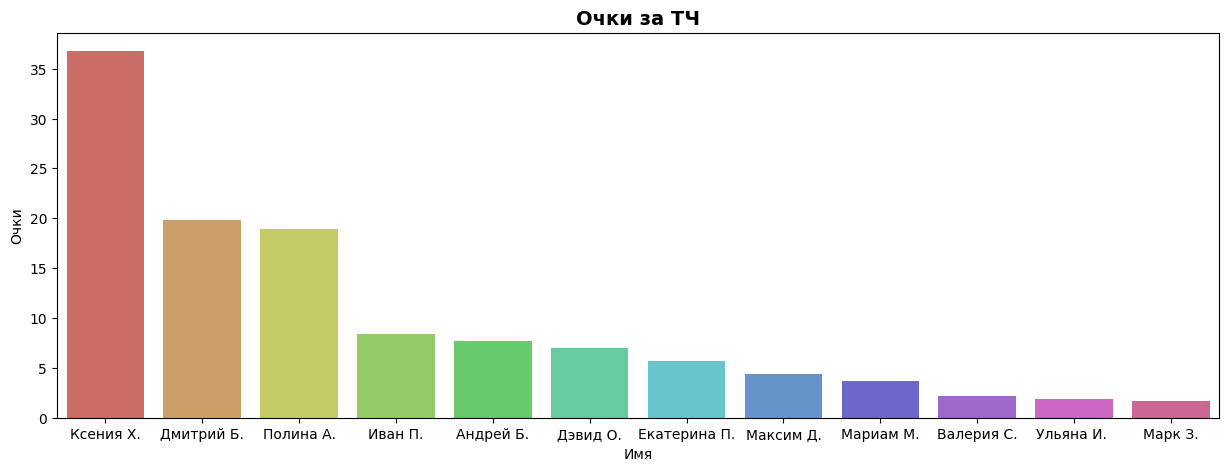

In [6]:
comp_points = an.competative_points(df, weight_func='sigm', topic="ТЧ").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Очки за ТЧ", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
#plt.axhline(comp_points["Очки"].mean())
plt.show()

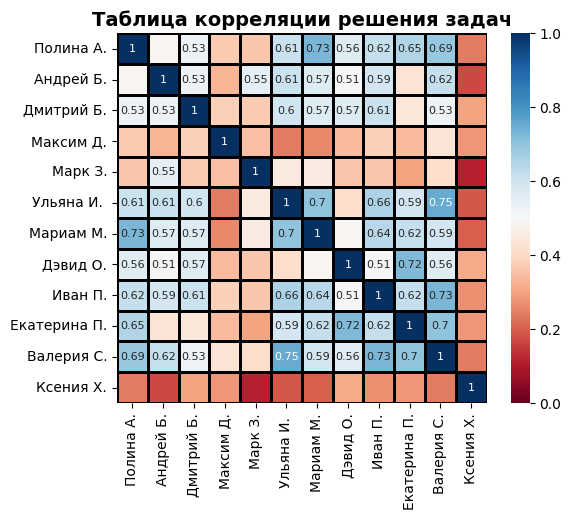

In [7]:
df1 = an.bin_conduit(an.topic_loc(df, topic="Комбинаторика"))
colormap = plt.cm.RdBu
ax = sns.heatmap(
    np.round(df1.corr(numeric_only=True), 2),
    linewidths=0.8,
    vmax=1.0,
    vmin = 0,
    square=True,
    cmap=colormap,
    linecolor="black",
    annot=True,
    annot_kws={"fontsize":8},
)

for i in ax.texts:
    if abs(float(i.get_text())) < 0.5:
        i.set_text("")

plt.title("Таблица корреляции решения задач", weight="heavy", size=14)

plt.show()

In [8]:
stats = an.stats(df)
stats

,Соревновательные очки,Среднее кол-во очков за задачу,Соревновательные очки в комбинаторике,Среднее кол-во очков за задачу в комбинаторике,Соревновательные очки в ТЧ,Среднее кол-во очков за задачу в ТЧ,Соревновательные очки в графах,Среднее кол-во очков за задачу в графах,Стартовые соревновательные очки
Полина А.,24.207797,0.138330,4.265742,0.055399,18.928171,0.236602,1.013884,0.056327,30.548151
Андрей Б.,9.087207,0.063994,1.383687,0.022318,7.682801,0.120044,0.020719,0.001295,26.495739
Дмитрий Б.,28.179601,0.153987,8.363229,0.099562,19.792443,0.241371,0.023930,0.001408,36.379137
Максим Д.,16.875841,0.108178,11.511463,0.140384,4.350495,0.077687,1.013884,0.056327,8.283692
Марк З.,2.344058,0.026637,0.642710,0.016480,1.677418,0.052419,0.023930,0.001408,9.301931
Ульяна И.,2.946457,0.023385,1.020315,0.015229,1.902212,0.045291,0.023930,0.001408,1.005035
Мариам М.,5.489745,0.039212,1.822199,0.026409,3.650037,0.065179,0.017509,0.001167,6.624523
Дэвид О.,16.286062,0.095240,9.271710,0.109079,6.990423,0.101310,0.023930,0.001408,34.801339
Иван П.,13.256436,0.081328,4.860562,0.060007,8.371945,0.128799,0.023930,0.001408,46.775947
Екатерина П.,12.086872,0.074610,6.368665,0.077667,5.694277,0.090385,0.023930,0.001408,14.888027


In [21]:
an.personal_stats(stats, "Валерия С.")

Валерия С.
Соревновательные очки: 4.92, #10
Среднее кол-во очков за задачу: 0.04, #10
Соревновательные очки в комбинаторике: 2.74, #8
Среднее кол-во очков за задачу в комбинаторике: 0.04, #8
Соревновательные очки в ТЧ: 2.15, #10
Среднее кол-во очков за задачу в ТЧ: 0.06, #10
Соревновательные очки в графах: 0.02, #4
Среднее кол-во очков за задачу в графах: 0.0, #4
Стартовые соревновательные очки: 3.95, #11
